In [33]:
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

In [9]:
dataset = MNIST(root='data/', download=True)

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
len(dataset)

60000

In [12]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [13]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [34]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [35]:
for images, labels in train_loader:
  break
images.reshape(128, 784).shape

torch.Size([128, 784])

In [41]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [42]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [43]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [44]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [45]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 2.0017, val_acc: 0.5744
Epoch [1], val_loss: 1.7210, val_acc: 0.7182
Epoch [2], val_loss: 1.5108, val_acc: 0.7563
Epoch [3], val_loss: 1.3522, val_acc: 0.7795
Epoch [4], val_loss: 1.2306, val_acc: 0.7941


In [46]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1354, val_acc: 0.8035
Epoch [1], val_loss: 1.0593, val_acc: 0.8106
Epoch [2], val_loss: 0.9972, val_acc: 0.8152
Epoch [3], val_loss: 0.9457, val_acc: 0.8193
Epoch [4], val_loss: 0.9022, val_acc: 0.8237


In [47]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8651, val_acc: 0.8279
Epoch [1], val_loss: 0.8329, val_acc: 0.8314
Epoch [2], val_loss: 0.8048, val_acc: 0.8342
Epoch [3], val_loss: 0.7800, val_acc: 0.8384
Epoch [4], val_loss: 0.7579, val_acc: 0.8412


In [48]:
history3 = fit(200, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7381, val_acc: 0.8429
Epoch [1], val_loss: 0.7203, val_acc: 0.8448
Epoch [2], val_loss: 0.7041, val_acc: 0.8480
Epoch [3], val_loss: 0.6894, val_acc: 0.8496
Epoch [4], val_loss: 0.6759, val_acc: 0.8512
Epoch [5], val_loss: 0.6634, val_acc: 0.8531
Epoch [6], val_loss: 0.6519, val_acc: 0.8544
Epoch [7], val_loss: 0.6413, val_acc: 0.8554
Epoch [8], val_loss: 0.6314, val_acc: 0.8562
Epoch [9], val_loss: 0.6221, val_acc: 0.8570
Epoch [10], val_loss: 0.6135, val_acc: 0.8583
Epoch [11], val_loss: 0.6054, val_acc: 0.8595
Epoch [12], val_loss: 0.5978, val_acc: 0.8607
Epoch [13], val_loss: 0.5906, val_acc: 0.8617
Epoch [14], val_loss: 0.5838, val_acc: 0.8624
Epoch [15], val_loss: 0.5774, val_acc: 0.8627
Epoch [16], val_loss: 0.5713, val_acc: 0.8630
Epoch [17], val_loss: 0.5656, val_acc: 0.8636
Epoch [18], val_loss: 0.5601, val_acc: 0.8647
Epoch [19], val_loss: 0.5549, val_acc: 0.8656
Epoch [20], val_loss: 0.5499, val_acc: 0.8660
Epoch [21], val_loss: 0.5451, val_acc: 0.867

In [55]:
history4 = fit(100, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.3615, val_acc: 0.9015
Epoch [1], val_loss: 0.3612, val_acc: 0.9018
Epoch [2], val_loss: 0.3609, val_acc: 0.9019
Epoch [3], val_loss: 0.3607, val_acc: 0.9018
Epoch [4], val_loss: 0.3604, val_acc: 0.9021
Epoch [5], val_loss: 0.3602, val_acc: 0.9020
Epoch [6], val_loss: 0.3599, val_acc: 0.9020
Epoch [7], val_loss: 0.3596, val_acc: 0.9022
Epoch [8], val_loss: 0.3594, val_acc: 0.9022
Epoch [9], val_loss: 0.3591, val_acc: 0.9022
Epoch [10], val_loss: 0.3589, val_acc: 0.9026
Epoch [11], val_loss: 0.3586, val_acc: 0.9026
Epoch [12], val_loss: 0.3583, val_acc: 0.9029
Epoch [13], val_loss: 0.3581, val_acc: 0.9028
Epoch [14], val_loss: 0.3579, val_acc: 0.9028
Epoch [15], val_loss: 0.3576, val_acc: 0.9028
Epoch [16], val_loss: 0.3574, val_acc: 0.9028
Epoch [17], val_loss: 0.3571, val_acc: 0.9028
Epoch [18], val_loss: 0.3569, val_acc: 0.9030
Epoch [19], val_loss: 0.3566, val_acc: 0.9029
Epoch [20], val_loss: 0.3564, val_acc: 0.9029
Epoch [21], val_loss: 0.3562, val_acc: 0.902

In [56]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

In [57]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 0 , Predicted: 0


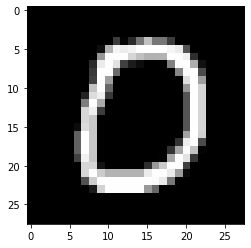

In [58]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


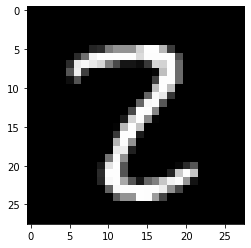

In [52]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 7 , Predicted: 7


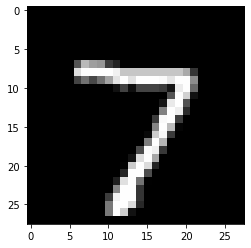

In [53]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [60]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.9131835699081421, 'val_loss': 0.3187054991722107}